# Predicting House Prices with Regression using TensorFlow
เอกสารประกอบ <br>
https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
The Data
We will be using data from a Kaggle data set:
https://www.kaggle.com/harlfoxem/housesalesprediction
Feature Columns
id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasources/kc_house_data.csv')
df.sample(5)

id       date     price  bedrooms  bathrooms  sqft_living  \
8614   6303400395  1/30/2015  325000.0         1       0.75          410   
6934   2571900380  1/22/2015  225000.0         3       2.00         1610   
8565   6666860210   6/2/2014  316000.0         3       2.25         2130   
12756  7518505040  3/30/2015  415000.0         1       1.00          700   
7410   8665900328  1/23/2015  459000.0         4       3.00         1900   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8614       8636     1.0           0     0  ...      4         410   
6934       8400     1.0           0     0  ...      8        1610   
8565       8721     1.0           0     0  ...      8        1570   
12756      2550     1.0           0     0  ...      6         700   
7410       9077     2.0           0     0  ...      7        1900   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8614               0      1953             0    98146  47.5077 -122.357   
6934               0      1990             0    98022  47.1958 -122.009   
8565             560      1987             0    98031  47.4202 -122.204   
12756              0      1954             0    98117  47.6783 -122.383   
7410               0      1954          2015    98155  47.7684 -122.304   

       sqft_living15  sqft_lot15  
8614            1190        8636  
6934            1930        8459  
8565            2130        9477  
12756           1330        4110  
7410            1900       12868  

[5 rows x 21 columns]

In [3]:
df = df.drop('id',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1)
y = df['price']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [7]:
X_train.shape

(15117, 17)

In [8]:
X_train.sample(5)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
1180          4        2.5         3300    101930     2.0           0     0   
9070          3        2.5         1690      1613     2.0           0     0   
8642          3        1.0         1050      8498     1.0           0     0   
16799         4        2.0         1970      7451     1.0           0     0   
19863         4        4.0         4420      5940     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
1180           4     10        3300              0      1991             0   
9070           3      8        1150            540      2014             0   
8642           4      7        1050              0      1959             0   
16799          3      8        1350            620      1962             0   
19863          3     10        3410           1010      2006             0   

           lat     long  sqft_living15  sqft_lot15  
1180   47.5760 -121.976           2880      213879  
9070   47.5524 -121.998           1690        1619  
8642   47.4043 -122.202           1050        8498  
16799  47.7650 -122.335           1980        7510  
19863  47.5397 -122.072           4510        5797

In [9]:
y_test

15832     319000.0
6001      464625.0
4256      489950.0
15849     395000.0
4088      458000.0
           ...    
16591     585000.0
17052     132825.0
10587     422500.0
11204     435000.0
1679     1230000.0
Name: price, Length: 6480, dtype: float64

In [10]:
len(X_train),len(X_test),

(15117, 6480)

In [11]:
model = Sequential()

model.add(Dense(17,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(34,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [12]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 4ms/step - loss: 488041.6562 - val_loss: 380888.7812
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 308390.8750 - val_loss: 187845.3281
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 175193.4375 - val_loss: 162845.5156
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 168618.3906 - val_loss: 161474.4688
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 166337.7188 - val_loss: 160498.2969
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 165116.1406 - val_loss: 157522.7188
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 163879.0625 - val_loss: 156651.4219
Epoch 8/100
119/119 [==============================] - 0s 4ms/step - loss: 162984.7031 - val_loss: 156312.7656
Epoch 9/100
119/119 [==============================] - 0s 4ms/step - loss: 162610.2812 - val_loss: 155858.4844
E

119/119 [==============================] - 0s 2ms/step - loss: 157294.9219 - val_loss: 152020.5781
Epoch 75/100
119/119 [==============================] - 0s 2ms/step - loss: 157340.1719 - val_loss: 151845.5312
Epoch 76/100
119/119 [==============================] - 0s 2ms/step - loss: 157408.1406 - val_loss: 151415.6406
Epoch 77/100
119/119 [==============================] - 0s 2ms/step - loss: 157103.1562 - val_loss: 151955.8281
Epoch 78/100
119/119 [==============================] - 0s 2ms/step - loss: 157435.5156 - val_loss: 152362.7500
Epoch 79/100
119/119 [==============================] - 0s 2ms/step - loss: 157056.8438 - val_loss: 152025.4844
Epoch 80/100
119/119 [==============================] - 0s 2ms/step - loss: 157135.9844 - val_loss: 151326.1094
Epoch 81/100
119/119 [==============================] - 0s 2ms/step - loss: 156824.6406 - val_loss: 150974.4688
Epoch 82/100
119/119 [==============================] - 0s 2ms/step - loss: 156748.5781 - val_loss: 158064.8125
Epoch

<AxesSubplot:>

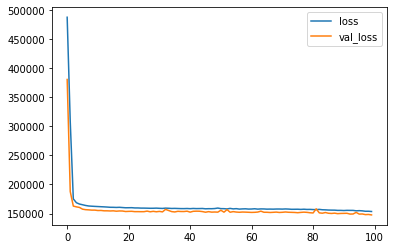

In [13]:
losses = pd.DataFrame(model.history.history)
losses.plot()

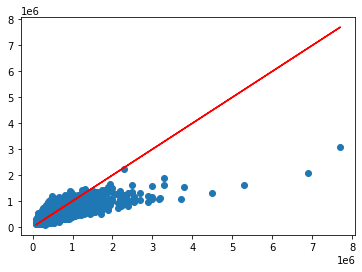

In [14]:
predictions = model.predict(X_test)

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [15]:
y_test.shape,predictions.shape

((6480,), (6480, 1))

In [16]:
y_test.values.reshape(6480, 1)

array([[ 319000.],
       [ 464625.],
       [ 489950.],
       ...,
       [ 422500.],
       [ 435000.],
       [1230000.]])

In [17]:
errors = y_test.values.reshape(6480, 1) - predictions

<AxesSubplot:>

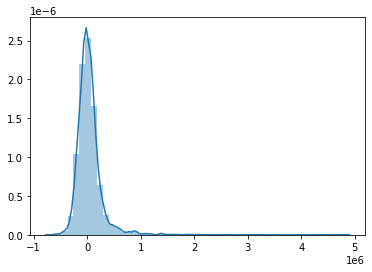

In [18]:
sns.distplot(errors)

<AxesSubplot:>

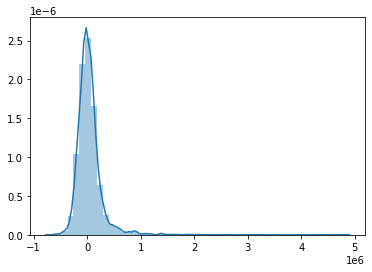

In [19]:
errors = np.array(y_test) - predictions.reshape(1,6480)[0]
sns.distplot(errors)

In [20]:
errors

array([  -9811.40625,  -47256.53125,   40475.40625, ...,  119217.03125,
       -227086.6875 ,  592521.9375 ])

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
mean_absolute_error(y_test,predictions)

147610.66683183835

In [22]:
np.sqrt(mean_squared_error(y_test,predictions))

250111.25841469318

# ทดลองปรับ Date แยกออกมาเป็น วันเดือนปี

In [23]:
df = pd.read_csv('../datasources/kc_house_data.csv')

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('id',axis=1)
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [26]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 4ms/step - loss: 542433.5000 - val_loss: 534634.5625
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 533953.0625 - val_loss: 503998.5000
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 409512.1875 - val_loss: 230477.9062
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 193658.5938 - val_loss: 182316.6562
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 185770.8594 - val_loss: 179669.3125
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 182998.4062 - val_loss: 176965.7656
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 180173.1562 - val_loss: 174127.7656
Epoch 8/100
119/119 [==============================] - 0s 3ms/step - loss: 177188.5938 - val_loss: 171132.4062
Epoch 9/100
119/119 [==============================] - 0s 3ms/step - loss: 174060.6719 - val_loss: 167906.8594
E

119/119 [==============================] - 0s 2ms/step - loss: 111224.4219 - val_loss: 106982.0469
Epoch 75/100
119/119 [==============================] - 1s 6ms/step - loss: 111246.3438 - val_loss: 106953.1172
Epoch 76/100
119/119 [==============================] - 0s 4ms/step - loss: 111030.9609 - val_loss: 106980.3984
Epoch 77/100
119/119 [==============================] - 0s 2ms/step - loss: 111045.8984 - val_loss: 106704.4219
Epoch 78/100
119/119 [==============================] - 0s 3ms/step - loss: 110840.4609 - val_loss: 106838.6797
Epoch 79/100
119/119 [==============================] - 0s 2ms/step - loss: 110790.7734 - val_loss: 106534.7969
Epoch 80/100
119/119 [==============================] - 0s 2ms/step - loss: 110707.7422 - val_loss: 106487.1797
Epoch 81/100
119/119 [==============================] - 0s 2ms/step - loss: 110603.5391 - val_loss: 106350.4609
Epoch 82/100
119/119 [==============================] - 1s 6ms/step - loss: 110529.9297 - val_loss: 106303.8047
Epoch

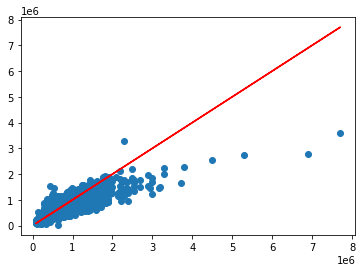

In [27]:
predictions = model.predict(X_test)
 
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [28]:
mean_squared_error(y_test,predictions)

36330112119.88577

In [29]:
np.sqrt(mean_squared_error(y_test,predictions))

190604.59627166856

<AxesSubplot:>

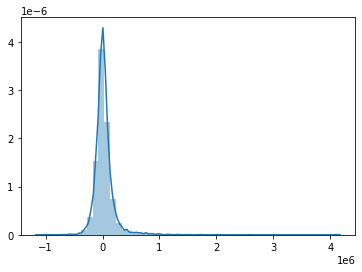

In [30]:
errors = y_test.values.reshape(6480, 1) - predictions
sns.distplot(errors)